#Zomato Data Analysis Project

Step 1 - importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 - Create dataframe 

In [12]:
df = pd.read_csv('Zomato data .csv')

In [14]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step 3 - Data Cleaning

In [16]:
#comvert the data type of coloum - rate
def handlerate(value):
    value =str(value).split('/')
    value = value[0];
    return float(value)
df['rate'] = df['rate'].apply(handlerate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Step - 4

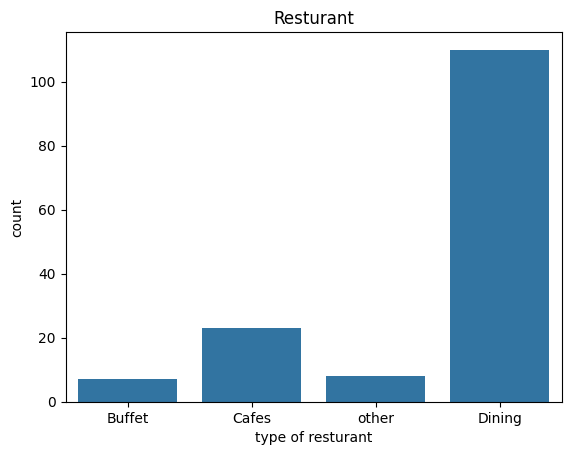

In [20]:
#type of resturant
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("type of resturant")
plt.title("Resturant")   
plt.show()              
              

Conclusion - majaority of the resturant falls in dining category

In [21]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


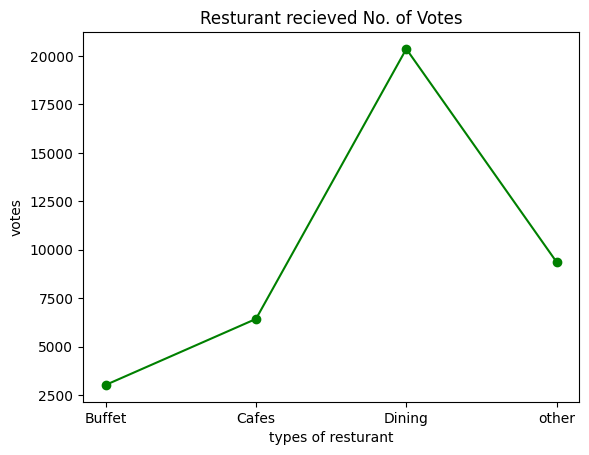

In [24]:
#Resturant recieved no.of votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, color ="green", marker ="o",)
plt.xlabel("types of resturant")
plt.ylabel("votes")
plt.title("Resturant recieved No. of Votes")
plt.show()

Conclusion - Dining Resturant has recieved maxmimum number of votes

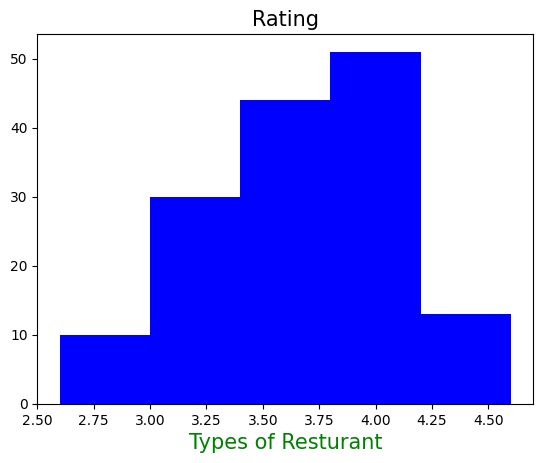

In [27]:
#Rating the majority of resturant recieved
plt.hist(df['rate'],bins = 5, color = "blue")
plt.xlabel("Types of Resturant", color = "green", size = 15)
plt.title("Rating", size = 15)
plt.show()

Conclusion - majority of resturant recieved ratings from 3.5 to 4

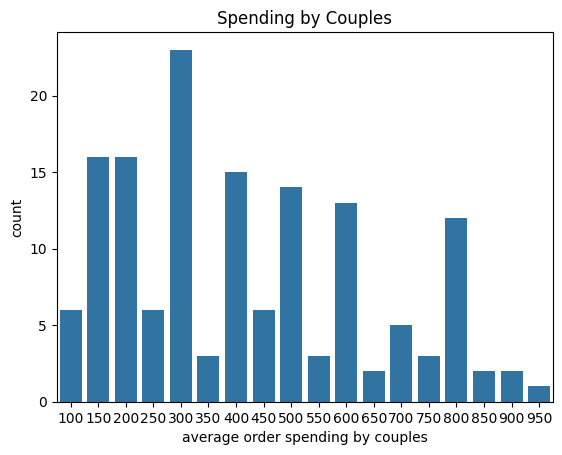

In [30]:
# Average order spending by couples
order_couple = df['approx_cost(for two people)']
sns.countplot(x = order_couple)
plt.xlabel("average order spending by couples")
plt.title("Spending by Couples")
plt.show()
           

Conclusion - average order spending by couples is Rs 300

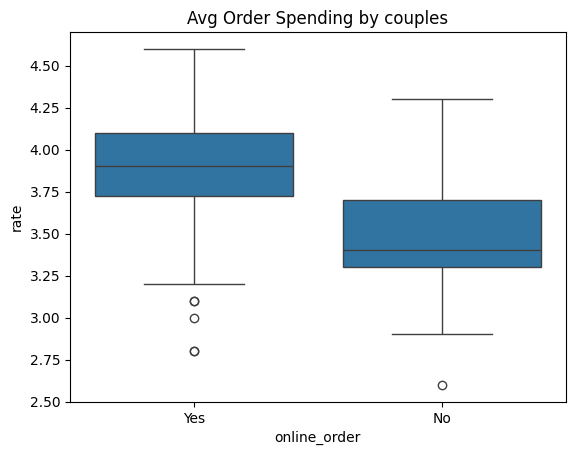

In [33]:
# mode(online and offline) has recieved the maximum rating
sns.boxplot(x = 'online_order',y = 'rate', data = df)
plt.title("Avg Order Spending by couples")
plt.show()

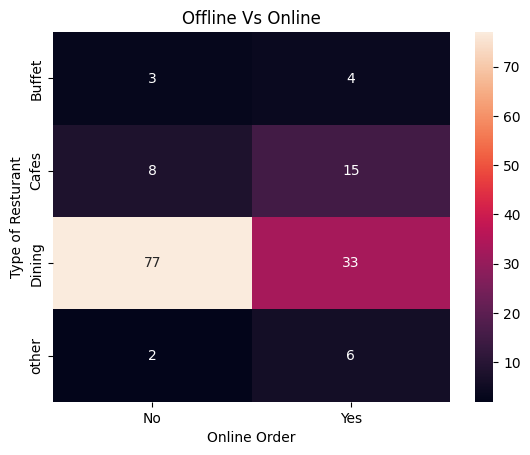

In [37]:
# type of resturant recieved more offline orders
pivot_table = df.pivot_table(index = 'listed_in(type)',columns = 'online_order',aggfunc = 'size',fill_value = 0)
sns.heatmap(pivot_table,annot = True)
plt.xlabel("Online Order")
plt.ylabel("Type of Resturant")
plt.title("Offline Vs Online")
plt.show()


Conclusion - Dining Resturant primarily accept offline orders, whereas cafes primarily recieved online orders.This suggest that clients prefer 
orders in person at resturants, but prefer online ordering at cafes.